In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
plt.style.use('fivethirtyeight')

In [3]:
N = 60 #no of days for test split
i = 1800 # one example time series to train

In [6]:
all_data = pd.read_csv('Data1\\Data1\\section 6\\train-1.csv').T
key =pd.read_csv("Data1\\Data1\\section 6\\key-1.csv")

In [7]:
# Handle N/A
train, test = all_data.iloc[0:-N,:], all_data.iloc[-N:,:]

test_cleaned = test.T.fillna(method='ffill').T
train_cleaned = train.T.iloc[:,1:].fillna(method='ffill').T

In [16]:
# fill outliers that are out of 1.5*std with rolling mean of 50 days
data=train_cleaned.iloc[:,i].to_frame()
data.columns = ['visits']
#data['mean'] = pd.rolling_mean(data.visits,50,min_periods=1)
data['mean'] = pd.Series.rolling(data.visits,50,min_periods=1).mean()
std_mult = 1.5
data.ix[np.abs(data.visits-data.visits.mean())>=(std_mult*data.visits.std()), 'visits'] = data.ix[np.abs(data.visits-data.visits.mean())>=(std_mult*data.visits.std()),'mean']
data.index = pd.to_datetime(data.index)

C:\Users\bagwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


In [17]:
data.head()

,visits,mean
2015-07-01,1.0,1.0
2015-07-02,6.0,3.5
2015-07-03,8.0,5.0
2015-07-04,7.0,5.5
2015-07-05,12.0,6.8


### change label to make it Prophet ready

In [19]:
X = pd.DataFrame(index=range(0,len(data)))
X['ds'] = data.index
X['y'] = data['visits'].values
X.head()

,ds,y
0,2015-07-01,1.0
1,2015-07-02,6.0
2,2015-07-03,8.0
3,2015-07-04,7.0
4,2015-07-05,12.0


In [20]:
X.tail()

,ds,y
485,2016-10-28,12.0
486,2016-10-29,8.0
487,2016-10-30,11.0
488,2016-10-31,13.0
489,2016-11-01,8.0


In [23]:
m = Prophet(yearly_seasonality=True)
m.fit(X)
future = m.make_future_dataframe(periods=N)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [24]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,7.785942,4.284584,11.414979
546,2016-12-28,7.642568,4.084477,11.251840
547,2016-12-29,8.066874,4.500082,11.886185
548,2016-12-30,8.136121,4.384906,11.838206
549,2016-12-31,9.448377,5.534511,12.844246


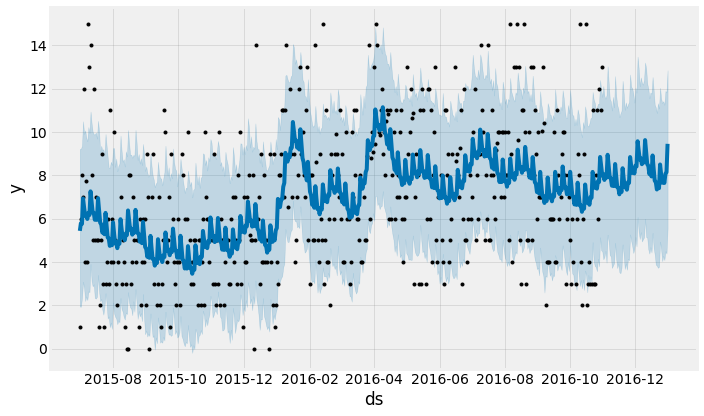

In [25]:
m.plot(forecast);